### 4. Type vs. Price: How do houses (h), townhouses (t), and units (u) compare in median price and price distribution?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:\\Users\\pc\\OneDrive\\Desktop\\data_analyst\\melbourne_housing_clean.csv')

In [3]:
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,Abbotsford,85 Turner St,2,House,1480000.0,Sold At Auction,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,Abbotsford,25 Bloomburg St,2,House,1035000.0,Sold At Auction,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,2,Abbotsford,5 Charles St,3,House,1465000.0,Sold Prior,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,Abbotsford,40 Federation La,3,House,850000.0,Passed In,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,Abbotsford,55a Park St,4,House,1600000.0,Vendor Bid,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
Type_name = df['Type'].value_counts().index.to_list()
Type_name

['House', 'Unit', 'Townhouse']

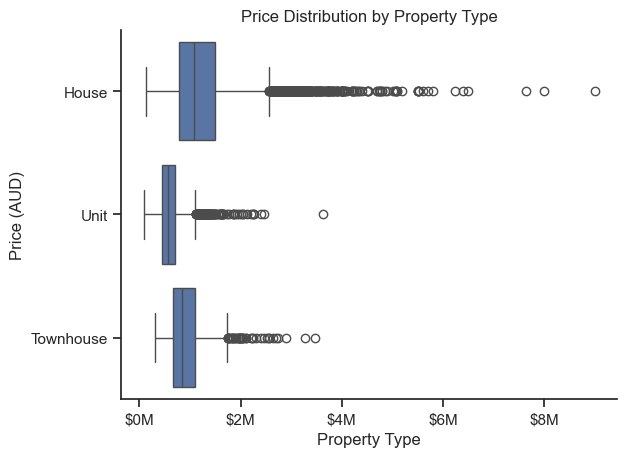

In [15]:
sns.set_theme(style='ticks')
sns.boxplot(
	data=df[df['Type'].isin(Type_name)],
	x='Price',
	y='Type'
)
sns.despine()

plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price (AUD)')
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000000)}M')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [13]:
df_median = (df.groupby('Type')['Price']
             .median()
             .reset_index()
             .sort_values(by='Price',ascending=False)
)

df_median

,Type,Price
0,House,1080000.0
1,Townhouse,846750.0
2,Unit,560000.0


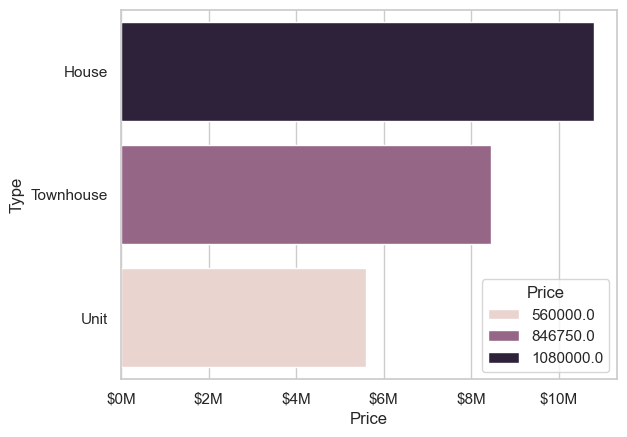

In [17]:
sns.set_theme(style='whitegrid')

sns.barplot(data=df_median,
              x='Price',
              y='Type',
              hue='Price',
              )
sns.color_palette("crest", as_cmap=True).get_over()
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/100000)}M')
plt.gca().xaxis.set_major_formatter(ticks_x)